Opcional --- Implementación en R
===

* *30 min* | Última modificación: Junio 22, 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS, 
    n_features=2,
    centers=3,
    cluster_std=0.8, 
    shuffle=False,  
    random_state=12345)

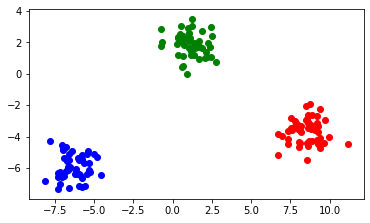

In [3]:
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

In [4]:
%%R
##
## Este código es idéntico al del ADALINE, excepto
## por ligeros cambios en la regla de aprendizaje
##
## Esta función entrena el modelo. Retorna una lista
## con los pesos optimos w y la evolución del error
##
##   - x: un dataframe con las variables de entrada
##   - d: un vector con la clase a que pertenece cada punto
##   - mu: tasa de aprendizaje
##   - max_iter: número total de iteraciones
##
train_perceptron <- function(x, d, mu, max_iter) {

    ## crea un vector columna inicial de ceros 
    ## para los pesos del perceptrón
    w <- matrix(rep(0, ncol(x) + 1), ncol(x) + 1, 1)
    
    ## agrega una columna de 1s a la matriz de las x
    x <- cbind(rep(1, nrow(x)), x)

    ## convierte el vector de clases a una matriz
    ## para faciliar los computos
    d <- matrix(d, length(d), 1)
    
    ## evolución del error
    history <- c()
    
    for(i in 1:max_iter) {
        ## selecciona aleatoriamente un ejemplo 
        n <- sample(1:nrow(x), 1)
        
        ## salida del combiador lineal adaptativo
        ## para el ejemplo seleccionado
        p <- x[n,] %*% w
        
        ## aplica el conmutador bipolar
        p <- ifelse(p > 0, +1, -1)
        
        ## error instántaneo para el ejemplo
        ## seleccionado
        e <- d[n] - p  
        
        ## computa la corrección de los pesos
        w <- w + 2 * mu * e[1,1] * matrix(x[n,], nrow(w), 1)
        
        ## almacena el error cuadrático para 
        ## el patrón seleccionado
        history <- c(history, sum(e^2))
    }
    return(list(w, history))
}

In [5]:
%%R
##
## Esta función computa la salida del 
## perceptrón para una matriz 
## de variables de entrada x
##
predict_perceptron <- function(m, x) {

    ## agrega la columna de 1s
    x <- cbind(rep(1, nrow(x)), x)
    
    ## computa la entrada neta
    p <- x %*% m[[1]]
    
    ## aplica el conmutador bipolar y
    ## la devuelve    
    return(ifelse(p > 0, 1, -1))
}

### Entrenamiento del modelo

In [6]:
df = pd.DataFrame(
    data=X,
    columns=['x1', 'x2']
)
df['d'] = d

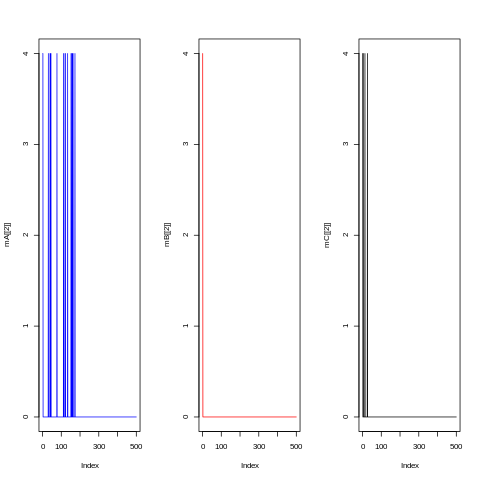

In [7]:
%%R -i df
##
## Solución 
## Se codifica un vector para cada clase
## un 1 indica que pertenece, y un -1 que
## no pertenece
##
A <- ifelse(df$d == 0, 1, -1) # el punto pertenece a la clase A o no
B <- ifelse(df$d == 1, 1, -1) # el punto pertenece a la clase B o no
C <- ifelse(df$d == 2, 1, -1) # el punto pertenece a la clase C o no
            
##
## Construye clasificadores usando la estrategia One-vs-the-Rest.
## mA es el clasificador que indica si el punto x pertenece a la 
## clase A o al resto, y así sucesivamente.
##
mA <- train_perceptron(data.matrix(df[,1:2]), A, mu=0.002, max_iter=500) 
mB <- train_perceptron(data.matrix(df[,1:2]), B, mu=0.002, max_iter=500)
mC <- train_perceptron(data.matrix(df[,1:2]), C, mu=0.003, max_iter=500)

##
## Se grafica la evolución del error para los clasificadores
## construidos. Note que no hay convergencia para el
## clasificador de la clase C.
##
options(repr.plot.width=11, repr.plot.height=4)
par(mfrow=c(1,3))
plot(mA[[2]], type = 'l', col = 'blue')
plot(mB[[2]], type = 'l', col = 'red')
plot(mC[[2]], type = 'l', col = 'black')

In [8]:
%%R
##
##  Pronostico para un punto que no pertence
##  a la muestra de datos
##
print(predict_perceptron(mA, matrix(c(2.5, -4), 1, 2)))
print(predict_perceptron(mB, matrix(c(2.5, -4), 1, 2)))
print(predict_perceptron(mC, matrix(c(2.5, -4), 1, 2)))

     [,1]
[1,]    1
     [,1]
[1,]    1
     [,1]
[1,]   -1


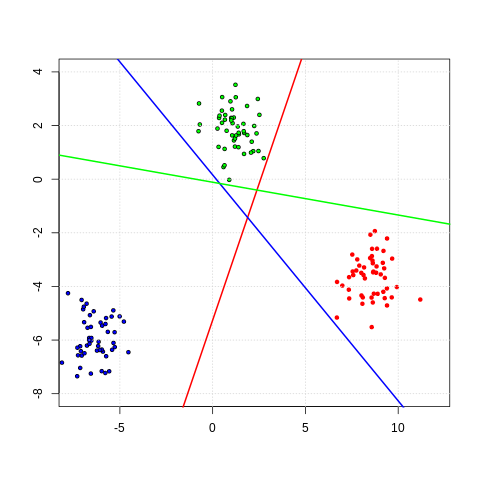

In [9]:
%%R
options(repr.plot.width=4, repr.plot.height=4)

with(df, plot(x1[d == 0], x2[d == 0], col = 'red', type = 'p', pch = 21, xlab='', ylab='',
                      bg = 'red', cex = 0.7,
                      xlim = c(-7.5, 12), 
                      ylim = c(-8, 4)))
with(df, points(x1[d == 1], x2[d == 1], bg = 'blue',  pch = 21, cex = 0.7))
with(df, points(x1[d == 2], x2[d == 2], bg = 'green', pch = 21, cex = 0.7))
grid()

abline(a = -mA[[1]][1] / mA[[1]][3], 
       b = -mA[[1]][2] / mA[[1]][3], lwd = 2, col = 'red')

abline(a = -mB[[1]][1] / mB[[1]][3], 
       b = -mB[[1]][2] / mB[[1]][3], lwd = 2, col = 'blue')

abline(a = -mC[[1]][1] / mC[[1]][3], 
       b = -mC[[1]][2] / mC[[1]][3], lwd = 2, col = 'green')